In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import prepare

### Acquire

In [2]:
df = acquire.acquire_agg_data()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169073 entries, 0 to 169072
Data columns (total 10 columns):
serial_number         169072 non-null object
model                 169073 non-null object
capacity_bytes        169073 non-null int64
max(failure)          169073 non-null int64
max(smart_9_raw)      161975 non-null float64
max(smart_5_raw)      161851 non-null float64
max(smart_187_raw)    104189 non-null float64
max(smart_188_raw)    104179 non-null float64
max(smart_197_raw)    161841 non-null float64
max(smart_198_raw)    161841 non-null float64
dtypes: float64(6), int64(2), object(2)
memory usage: 12.9+ MB


In [4]:
df.head()

,serial_number,model,capacity_bytes,max(failure),max(smart_9_raw),max(smart_5_raw),max(smart_187_raw),max(smart_188_raw),max(smart_197_raw),max(smart_198_raw)
0,PL1311LAG1SJAA,Hitachi HDS5C4040ALE630,4000787030016,0,43819.0,0.0,NaN,NaN,0.0,0.0
1,Z305KB36,ST4000DM000,4000787030016,0,31045.0,0.0,0.0,0.0,0.0,0.0
2,MJ0351YNG9MZXA,Hitachi HDS5C3030ALA630,3000592982016,0,41668.0,0.0,NaN,NaN,0.0,0.0
3,ZA11NHSN,ST8000DM002,8001563222016,0,26284.0,0.0,0.0,0.0,0.0,0.0
4,MJ1311YNG2ZSEA,Hitachi HDS5C3030ALA630,3000592982016,0,47994.0,0.0,NaN,NaN,0.0,0.0


### Prepare

In [5]:
df = prepare.prepare(df)

In [6]:
df.head()

,serial_number,manufacturer,model,capacity_gigabytes,failure,drive_age_in_years,reallocated_sectors_count,reported_uncorrectable_errors,command_timeout,current_pending_sector_count,uncorrectable_sector_count
0,PL1311LAG1SJAA,Hitachi,Hitachi HDS5C4040ALE630,4000.8,0,5.0,0.0,NaN,NaN,0.0,0.0
1,Z305KB36,Seagate,ST4000DM000,4000.8,0,3.5,0.0,0.0,0.0,0.0,0.0
2,MJ0351YNG9MZXA,Hitachi,Hitachi HDS5C3030ALA630,3000.6,0,4.8,0.0,NaN,NaN,0.0,0.0
3,ZA11NHSN,Seagate,ST8000DM002,8001.6,0,3.0,0.0,0.0,0.0,0.0,0.0
4,MJ1311YNG2ZSEA,Hitachi,Hitachi HDS5C3030ALA630,3000.6,0,5.5,0.0,NaN,NaN,0.0,0.0


### SMART_stat_5 
- reallocated

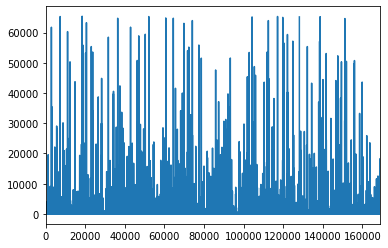

In [7]:
df.reallocated_sectors_count.plot()

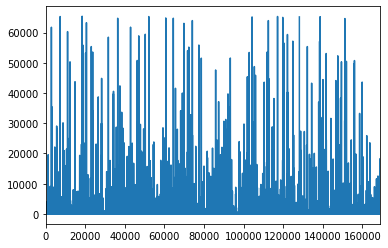

In [8]:
df.reallocated_sectors_count.plot()

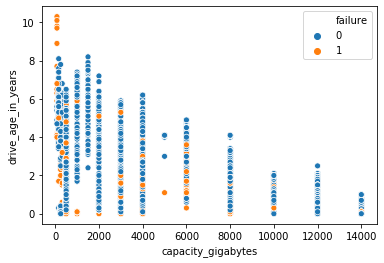

In [9]:
sns.scatterplot(x='capacity_gigabytes',y='drive_age_in_years',hue='failure',sizes=(20,200),data=df)


In [10]:
# drive age is 0 for 2779 observation

df['drive_age_in_years'].loc[lambda x: x== 0].index

Int64Index([   593,    748,    755,    763,    769,    798,    821,   1549,
              1617,   1618,
            ...
            168993, 169011, 169016, 169017, 169025, 169028, 169038, 169047,
            169050, 169052],
           dtype='int64', length=2779)

In [11]:
# Max age but drive has failed

df.iloc[1288]

serial_number                    WD-WCADW2290554
manufacturer                     Western Digital
model                                WDC WD800LB
capacity_gigabytes                            80
failure                                        1
drive_age_in_years                          10.3
reallocated_sectors_count                      0
reported_uncorrectable_errors                NaN
command_timeout                              NaN
current_pending_sector_count                   0
uncorrectable_sector_count                     0
Name: 1288, dtype: object

In [12]:
# Why is 0 listed in age???

df.iloc[169025]

serial_number                         ZJV3BFK8
manufacturer                           Seagate
model                            ST12000NM0007
capacity_gigabytes                     12000.1
failure                                      0
drive_age_in_years                           0
reallocated_sectors_count                    0
reported_uncorrectable_errors                0
command_timeout                              0
current_pending_sector_count                 0
uncorrectable_sector_count                   0
Name: 169025, dtype: object

In [13]:
(df.drive_age_in_years == 0).sum()

2779

In [14]:
top_model = [df.model=='ST12000NM0007']

In [15]:
top_model = pd.DataFrame(top_model) 

In [16]:
df

,serial_number,manufacturer,model,capacity_gigabytes,failure,drive_age_in_years,reallocated_sectors_count,reported_uncorrectable_errors,command_timeout,current_pending_sector_count,uncorrectable_sector_count
0,PL1311LAG1SJAA,Hitachi,Hitachi HDS5C4040ALE630,4000.8,0,5.0,0.0,NaN,NaN,0.0,0.0
1,Z305KB36,Seagate,ST4000DM000,4000.8,0,3.5,0.0,0.0,0.0,0.0,0.0
2,MJ0351YNG9MZXA,Hitachi,Hitachi HDS5C3030ALA630,3000.6,0,4.8,0.0,NaN,NaN,0.0,0.0
3,ZA11NHSN,Seagate,ST8000DM002,8001.6,0,3.0,0.0,0.0,0.0,0.0,0.0
4,MJ1311YNG2ZSEA,Hitachi,Hitachi HDS5C3030ALA630,3000.6,0,5.5,0.0,NaN,NaN,0.0,0.0
5,Z305D5VF,Seagate,ST4000DM000,4000.8,0,3.6,0.0,0.0,0.0,0.0,0.0
6,Z3015L2E,Seagate,ST4000DM000,4000.8,0,4.2,0.0,0.0,0.0,0.0,0.0
7,PL1331LAHDYJYH,Hitachi,HGST HMS5C4040BLE640,4000.8,0,3.4,0.0,NaN,NaN,0.0,0.0
8,Z304LAHP,Seagate,ST4000DM000,4000.8,0,3.9,0.0,0.0,0.0,0.0,0.0
9,Z302B0GK,Seagate,ST4000DM000,4000.8,0,4.2,0.0,0.0,0.0,0.0,0.0


In [17]:
df.capacity_gigabytes.value_counts()

 4000.8     64886
 12000.1    50729
 8001.6     26108
-0.0         7031
 3000.6      6789
 2000.4      4678
 500.1       2547
 6001.2      2411
 14000.5     1302
 10000.8     1255
 1000.2       388
 1500.3       267
 250.1        211
 160.0        209
 320.1        116
 480.0         60
 5001.0        46
 80.0          32
 137.4          7
 250.0          1
Name: capacity_gigabytes, dtype: int64

In [18]:
df.head(170)

,serial_number,manufacturer,model,capacity_gigabytes,failure,drive_age_in_years,reallocated_sectors_count,reported_uncorrectable_errors,command_timeout,current_pending_sector_count,uncorrectable_sector_count
0,PL1311LAG1SJAA,Hitachi,Hitachi HDS5C4040ALE630,4000.8,0,5.0,0.0,NaN,NaN,0.0,0.0
1,Z305KB36,Seagate,ST4000DM000,4000.8,0,3.5,0.0,0.0,0.0,0.0,0.0
2,MJ0351YNG9MZXA,Hitachi,Hitachi HDS5C3030ALA630,3000.6,0,4.8,0.0,NaN,NaN,0.0,0.0
3,ZA11NHSN,Seagate,ST8000DM002,8001.6,0,3.0,0.0,0.0,0.0,0.0,0.0
4,MJ1311YNG2ZSEA,Hitachi,Hitachi HDS5C3030ALA630,3000.6,0,5.5,0.0,NaN,NaN,0.0,0.0
5,Z305D5VF,Seagate,ST4000DM000,4000.8,0,3.6,0.0,0.0,0.0,0.0,0.0
6,Z3015L2E,Seagate,ST4000DM000,4000.8,0,4.2,0.0,0.0,0.0,0.0,0.0
7,PL1331LAHDYJYH,Hitachi,HGST HMS5C4040BLE640,4000.8,0,3.4,0.0,NaN,NaN,0.0,0.0
8,Z304LAHP,Seagate,ST4000DM000,4000.8,0,3.9,0.0,0.0,0.0,0.0,0.0
9,Z302B0GK,Seagate,ST4000DM000,4000.8,0,4.2,0.0,0.0,0.0,0.0,0.0


In [19]:
df.shape

(169073, 11)

In [20]:
df = prepare.unique(df)

In [21]:
df.shape

(162025, 11)